# Exploratory data analysis of California vineyards
The following notebook visualizes the data collected on vineyards vs non-vineyards to see if we can get clues on how to build the the most efficent & accurate predictive model.

## Import required packages and variables
We'll import the dataframe we created which contains elevation and weather data on the original addresses in our dataset 

In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

with open('california_vineyards_elevation_weather.pkl', 'rb') as f: 
    elevation_weather_df = pickle.load(f)
    
#convert rows from a given column into a numpy array
def rows_to_2D_array(col):
    for i, row in enumerate(col):
        if i == 0:
            arr = ([row])
        else:
            arr = np.vstack([arr,row])
    return arr
    
#convert rows from a given column into a numpy array
def rows_to_3D_array(col):
    for i, row in enumerate(col):
        if i == 0:
            arr = np.array([row[0]])
        else:
            arr = np.concatenate([arr, np.array([row[0]])], axis=0)
    return arr

is_vineyard = np.array(elevation_weather_df['IsVineyard']).astype(float)
map_coords = rows_to_2D_array(elevation_weather_df['MapCoords'])
elevation = rows_to_3D_array(elevation_weather_df['ElevationMatrix'])
wind_dir = rows_to_2D_array(elevation_weather_df['WindDir'])
wind_spd = rows_to_2D_array(elevation_weather_df['WindSpd'])
precip = rows_to_2D_array(elevation_weather_df['Precip'])
temp = rows_to_2D_array(elevation_weather_df['Temp'])
min_temp = rows_to_2D_array(elevation_weather_df['MinTemp'])
max_temp = rows_to_2D_array(elevation_weather_df['MaxTemp'])
clouds = rows_to_2D_array(elevation_weather_df['Clouds'])
ghi = rows_to_2D_array(elevation_weather_df['GHI'])
rh = rows_to_2D_array(elevation_weather_df['RH'])

## A map of the addresses in our data set
Below is a color-coded map of vineyards vs non-vineyards in our data set overlaid on top of a map of Calornia

In [20]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

land_color =  '#f1f7de'
water_color = '#edfbff'

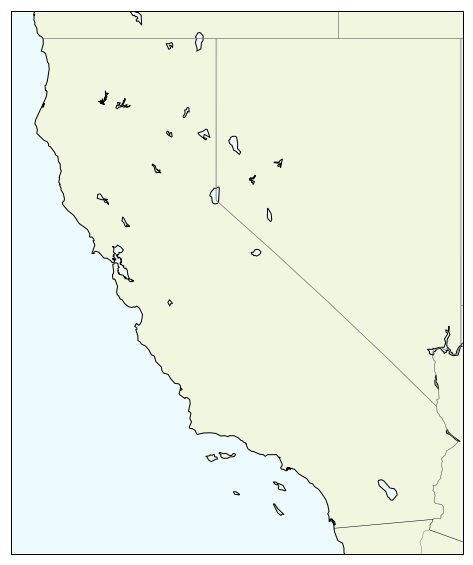

In [21]:
plt.figure(figsize=(12,10))

# Create a base a map of California
my_map = Basemap(projection='merc', 
    resolution = 'i', area_thresh = 50.0,
    llcrnrlon=-125, llcrnrlat=32,
    urcrnrlon=-114, urcrnrlat=42.5)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawstates(color='grey')
my_map.drawmapboundary(fill_color=water_color)
my_map.fillcontinents(color=land_color, lake_color=water_color)
plt.show()